## Exercises 3
Generate a report with a tool of your choice (eg. pandas, jupyter notebooks,etc), 
##### The report must comply the following requirements :
The summary_date must be in ISO Date format. <br>
The metrics must be grouped by campaign. <br>
The metrics that must be: <br>
Number of impressions. <br>
Number of clicks. <br>
Number of installs. <br>
Amount of spend. <br>
CTR (number of clicks/number of impressions) <br>
CPI (amount of spend/number of installs) <br>


       summary_date         app_id app_type        app_name  campaign_id  \
count          1570           1570     1570            1570         1570   
unique           61              1        1               1            7   
top      2022-06-27  com.super.app  android  Super App 2000  campaign_16   
freq             38           1570     1570            1570         1373   
mean            NaN            NaN      NaN             NaN          NaN   
std             NaN            NaN      NaN             NaN          NaN   
min             NaN            NaN      NaN             NaN          NaN   
25%             NaN            NaN      NaN             NaN          NaN   
50%             NaN            NaN      NaN             NaN          NaN   
75%             NaN            NaN      NaN             NaN          NaN   
max             NaN            NaN      NaN             NaN          NaN   

            campaign_name ad_id     ad_name   impressions        clicks  \
count       

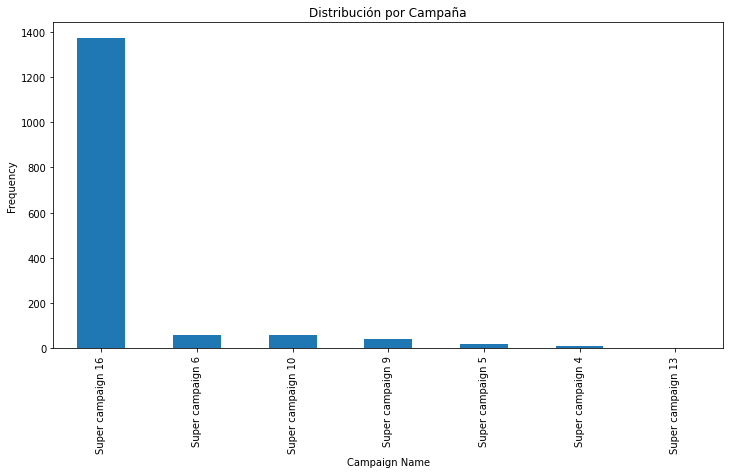

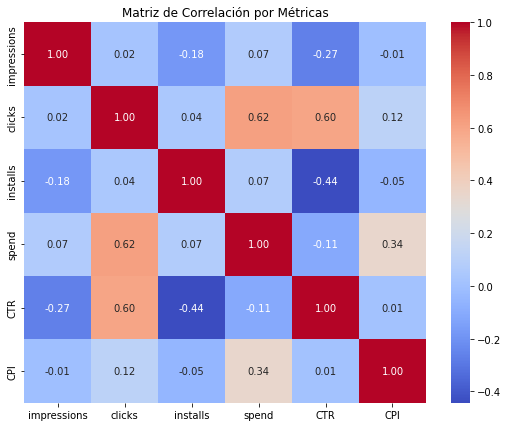

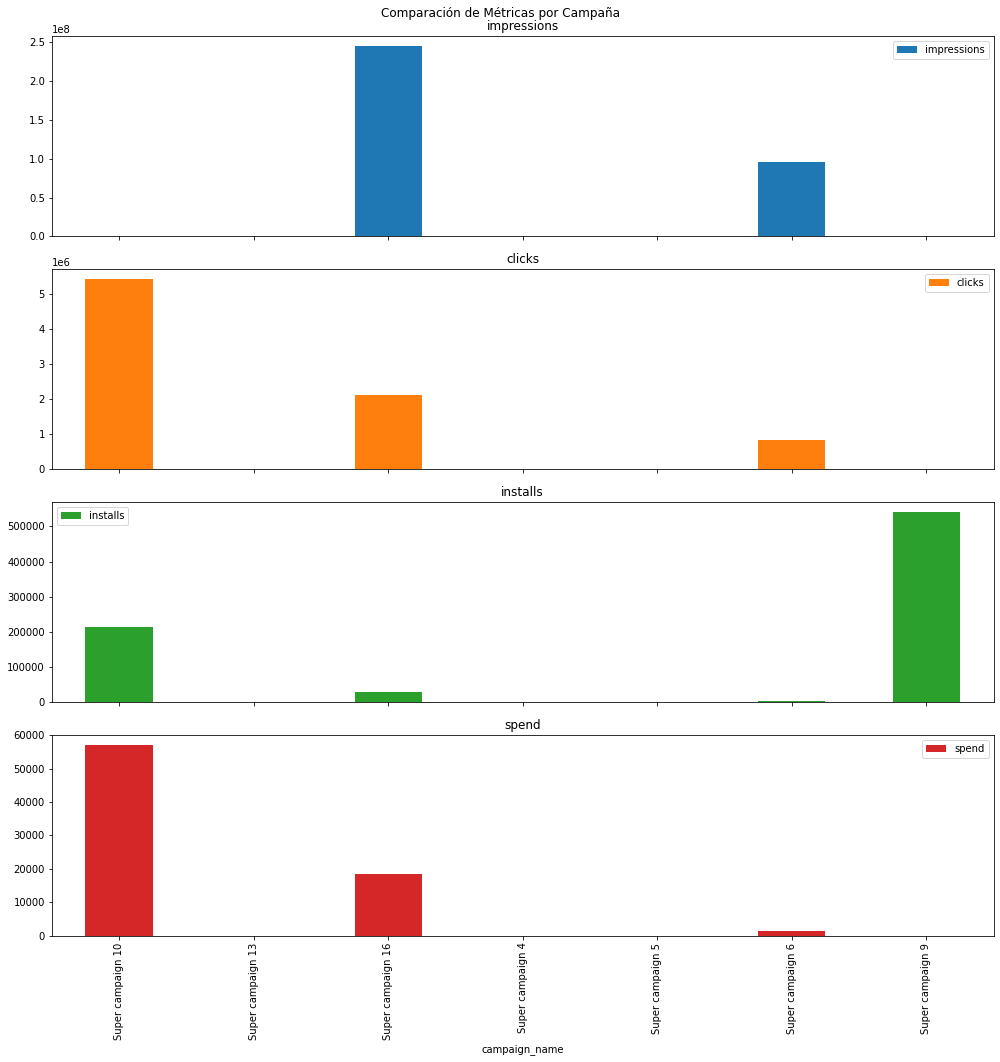

summary_date          0
app_id                0
app_type              0
app_name              0
campaign_id           0
campaign_name         0
ad_id               117
ad_name             117
impressions          81
clicks               81
installs            744
spend                81
event_name            0
events_d0           744
events_d7           744
unique_events_d0    744
unique_events_d7    744
dtype: int64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Función para convertir string de fecha a datetime
def convertir_a_fecha(fecha_str):
    fecha_string = "%Y.%m.%d"  # Formato actual del string summary_date
    try:
        fecha_date = datetime.strptime(fecha_str, fecha_string)
        return fecha_date.date()
    except ValueError:
        return None  # Errores por acá

# Lee el archivo CSV
df = pd.read_csv('dataset.csv')

# Convertimos la columna 'summary_date' a fecha
df['summary_date'] = df['summary_date'].apply(convertir_a_fecha)
summary_date = df['summary_date']
#iso_date = pd.to_datetime(summary_date).dt.date

# Ordenar por 'summary_date' en orden descendente
df = df.sort_values(by='summary_date', ascending=False)

# Agrupamos las metricas por por campaign_name y summary_date
metrics_grouped = df.groupby(['summary_date', 'campaign_name']).agg(
    {'impressions': 'sum',
     'clicks': 'sum',
     'installs': 'sum',
     'spend': 'sum'
    }).reset_index()

# Cálculo de CTR y CPI
metrics_grouped['CTR'] = metrics_grouped['clicks'] / metrics_grouped['impressions']
metrics_grouped['CPI'] = metrics_grouped['spend'] / metrics_grouped['installs']

# Exportar metrics_grouped a CSV con CTR y CPI
metrics_grouped.to_csv('report.csv', index=False)

# Agrupamos las metricas por solamente por campaign_name
grouped_only_by_campaign = df.groupby('campaign_name').agg(
    {'impressions': 'sum',
     'clicks': 'sum',
     'installs': 'sum',
     'spend': 'sum'
    }).reset_index()

# Exportar grouped_only_by_campaign a CSV
grouped_only_by_campaign.to_csv('report_grouped_by_campaign.csv', index=False)

# Descripción estadística básica
summary_statistics = df.describe(include='all')
print(summary_statistics)

# Exporta summary_statistics a CSV
summary_statistics.to_csv('summary_statistics.csv')

# Gráfico de barras por campaña, calcula la frecuencia de aparición de cada campaña
campaign_distribution = df['campaign_name'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Campaign Name')
plt.ylabel('Frequency')
plt.title('Distribución por Campaña', fontsize = 12)
plt.savefig('campaign_distribution.png')
plt.show()

# Heatmap de la métricas
correlation_matrix = metrics_grouped.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación por Métricas', fontsize = 12)
plt.savefig('correlation_matrix.png')
plt.show()

# Comparación entre campañas (por métricas agrupadas)
grouped_only_by_campaign.set_index('campaign_name').plot(kind='bar', figsize=(14, 15), subplots=True)
plt.suptitle('Comparación de Métricas por Campaña')
plt.tight_layout()
plt.savefig('metrics_comparison.png')
plt.show()

# Valores faltantes
missing_values = df.isnull().sum()
print(missing_values)